In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [2]:
df= pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


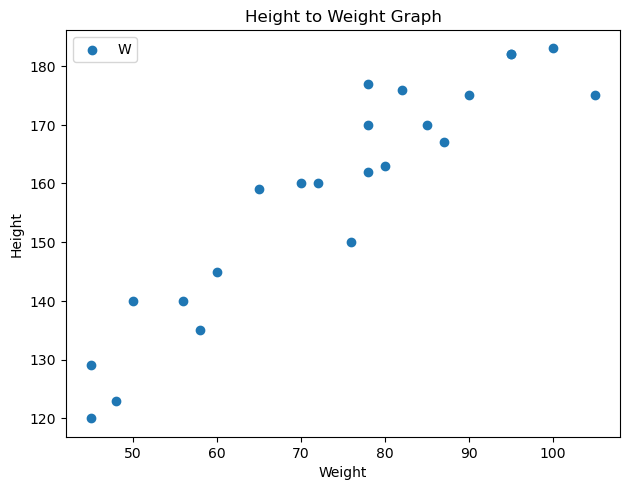

In [4]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.tight_layout()
plt.title("Height to Weight Graph")
plt.legend("Weight")

In [5]:
X=df[["Weight"]]
y=df["Height"]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [8]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

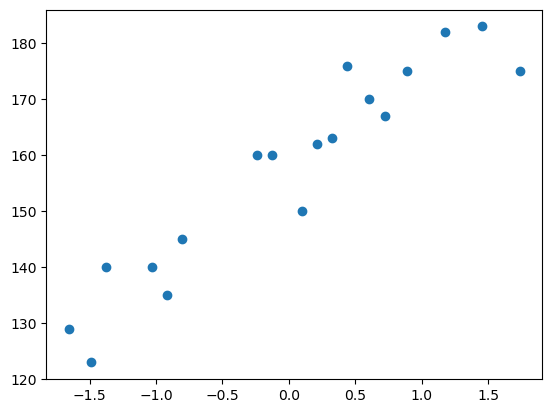

In [10]:
plt.scatter(X_train, y_train)

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
regressor =LinearRegression()

In [13]:
regressor

LinearRegression()

In [14]:
type(X_train)

numpy.ndarray

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [16]:
y_train.shape

(18,)

In [17]:
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
regressor.coef_

array([17.03440872])

In [19]:
regressor.intercept_

157.5

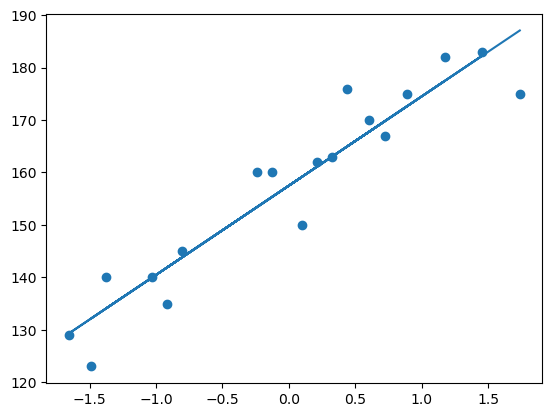

In [20]:
plt.scatter(X_train, y_train)

plt.plot(X_train, regressor.predict(X_train))

In [21]:
y_pred_test= regressor.predict(X_test)

In [22]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

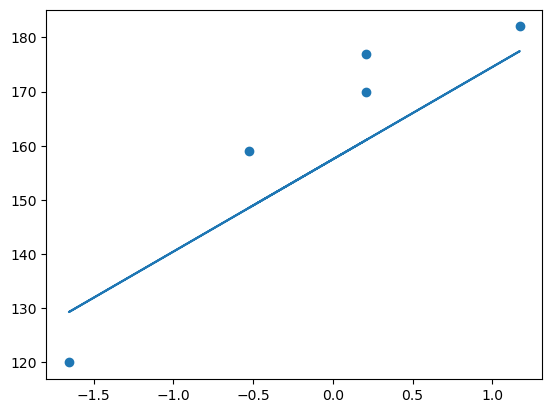

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mse= mean_squared_error(y_test, y_pred_test)

mae= mean_absolute_error(y_test, y_pred_test)

rmse= np.sqrt(mse)

In [26]:
print(mse, mae, rmse)

109.77592599051654 9.822657814519227 10.477400726827076


In [27]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)

score

0.7769869860423441

In [28]:
#adjusted r2 score

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [29]:
regressor.predict(scaler.transform([[75]]))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.19553315])

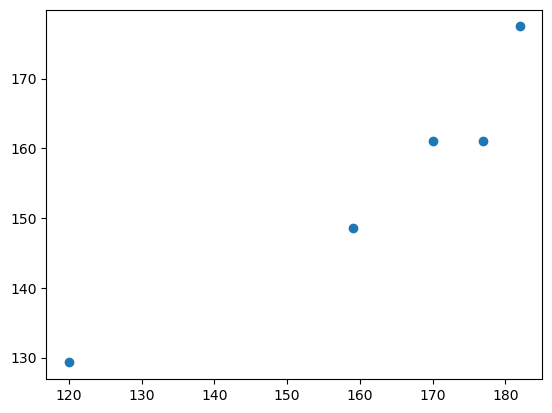

In [30]:
plt.scatter(y_test, y_pred_test)

In [31]:
residual= y_test-y_pred_test

residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

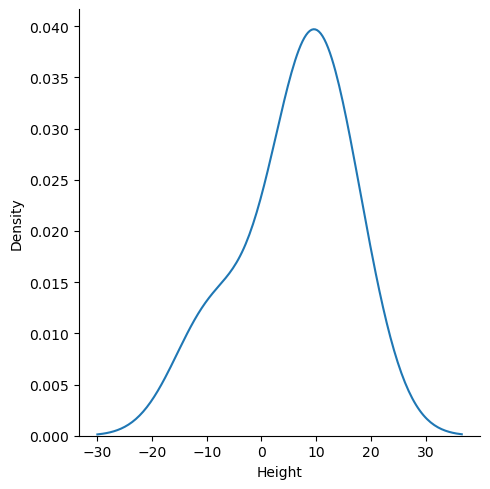

In [32]:
import seaborn as sns

sns.displot(residual, kind="kde")

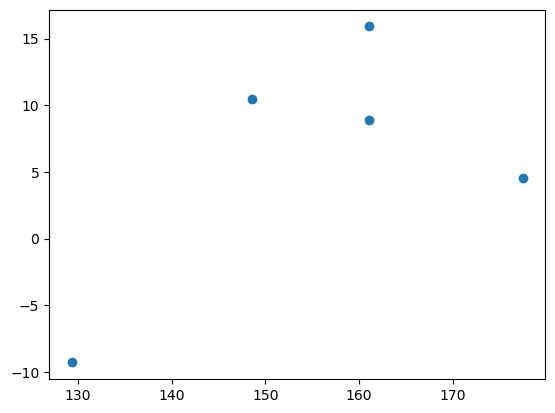

In [33]:
plt.scatter(y_pred_test, residual)

In [34]:
import statsmodels.api as sm

model=sm.OLS(y_train, X_train).fit()

prediction =model.predict(X_test) 

model.summary()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                       0.661
Time:                        09:20:15   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(regressor.coef_, regressor.intercept_)


[17.03440872] 157.5


In [37]:
import pickle

with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)